# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
complete_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
# Checking the number of mice.
num_mice=len(complete_mouse_data["Mouse ID"].unique())
num_mice

249

In [52]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = complete_mouse_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicate_mice_ids = complete_mouse_data.loc[duplicate_mice, "Mouse ID"].unique()
duplicate_mice_ids


array(['g989'], dtype=object)

In [53]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mask = complete_mouse_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicate_mice_data = complete_mouse_data[duplicate_mask]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [54]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data= complete_mouse_data.drop_duplicates(subset=["Mouse ID"], keep="first")
clean_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [55]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice=clean_mouse_data["Mouse ID"].nunique()
clean_num_mice

249

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_group=complete_mouse_data.groupby("Drug Regimen")
regimen_mean=regimen_group["Tumor Volume (mm3)"].mean()
regimen_median=regimen_group["Tumor Volume (mm3)"].median()
regimen_variance=regimen_group["Tumor Volume (mm3)"].var()
regimen_std=regimen_group["Tumor Volume (mm3)"].std()
regimen_sem=regimen_group["Tumor Volume (mm3)"].sem()

regimen_stats=pd.DataFrame({
    "Mean Tumor Volume": regimen_mean,
    "Median Tumor Volume": regimen_median,
    "Tumor Volume Variance": regimen_variance,
    "Tumor Volume Std. Dev.": regimen_std,
    "Tumor Volume Std. Err.": regimen_sem
})

regimen_stats




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [57]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_stats = regimen_group["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_summary_stats_df= pd.DataFrame(regimen_summary_stats)
regimen_summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

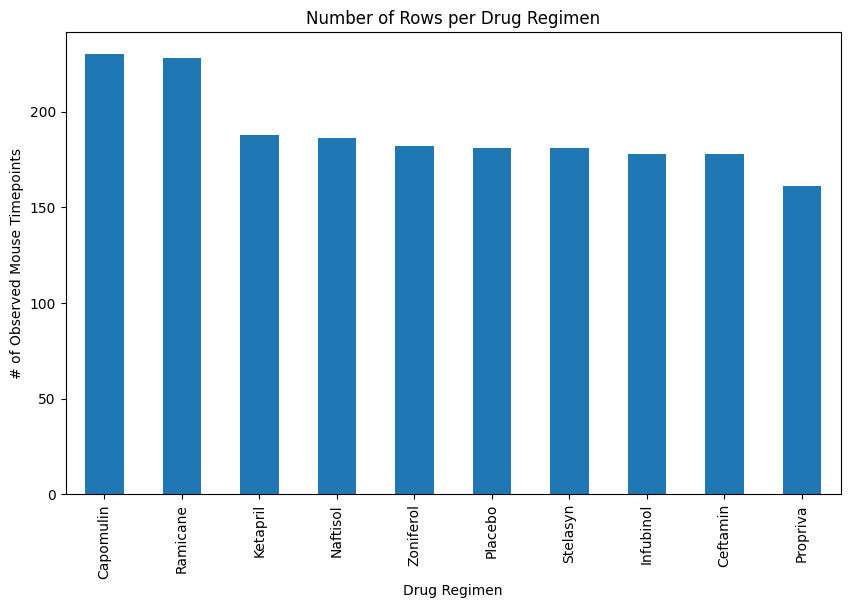

In [58]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = complete_mouse_data['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Rows per Drug Regimen')

# Show the plot
plt.show()

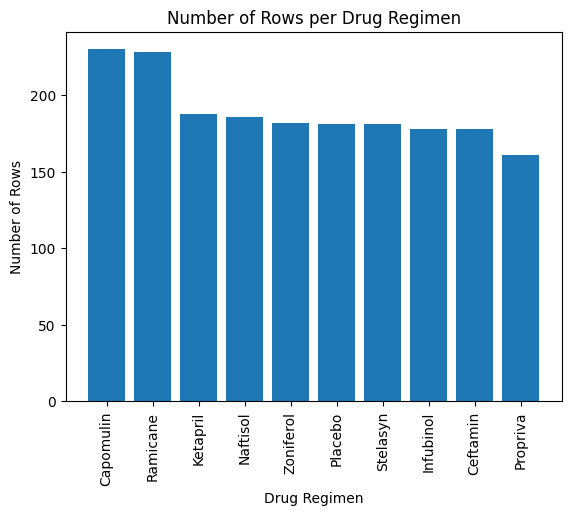

In [59]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Calculate the number of rows for each drug regimen
regimen_counts = complete_mouse_data['Drug Regimen'].value_counts()

regimens = regimen_counts.index
counts = regimen_counts.values

plt.bar(regimens, counts)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Number of Rows per Drug Regimen')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.show()

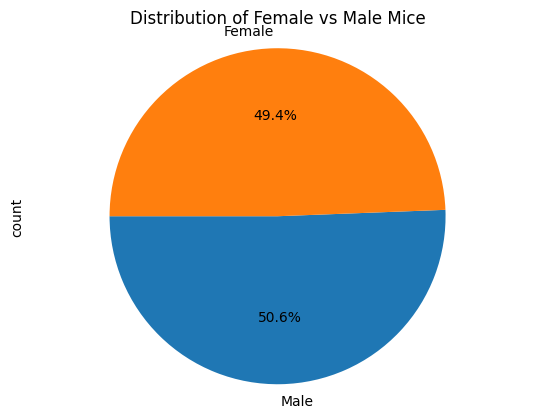

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the distribution of female and male mice
gender_distribution = complete_mouse_data['Sex'].value_counts()

gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=180)

plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')

plt.show()

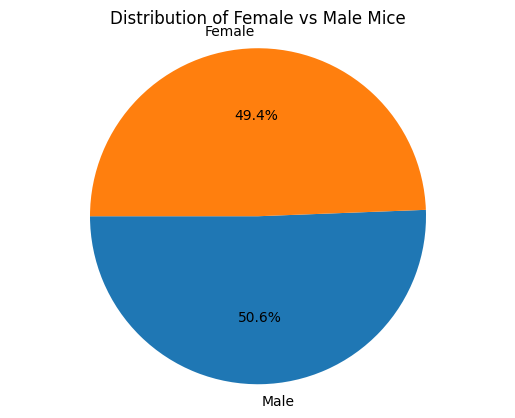

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate the distribution of female and male mice
gender_distribution = complete_mouse_data['Sex'].value_counts()

counts = gender_distribution.values
labels = gender_distribution.index

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=180)

plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')  # Ensure a circular pie plot

plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = complete_mouse_data.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, complete_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
select_data = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]
select_data_sorted=select_data.sort_values('Drug Regimen')
select_data_sorted


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
116,l897,45,Capomulin,Male,17,19,38.846876,1
86,j119,45,Capomulin,Female,7,23,38.125164,1
88,j246,35,Capomulin,Female,21,21,38.753265,1
193,u364,45,Capomulin,Male,18,17,31.023923,3
66,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
92,j913,45,Ramicane,Female,4,17,31.560470,1
94,j989,45,Ramicane,Male,8,19,36.134852,1
97,k403,45,Ramicane,Male,21,16,22.050126,1
120,m546,45,Ramicane,Male,18,16,30.564625,1


In [63]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for treatment in treatments:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

   
    # Locate the rows which contain mice on each drug and get the tumor volumes

      tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
      tumor_vol_data.append(tumor_vol)
    # add subset 

      tumor_vol_data.append(tumor_vol)
    # Determine outliers using upper and lower bounds
      quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
      lower_quartile = quartiles[0.25]
      upper_quartile = quartiles[0.75]
      iqr = upper_quartile - lower_quartile
    
      lower_bound = lower_quartile - (1.5 * iqr)
      upper_bound = upper_quartile + (1.5 * iqr)
    
      outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

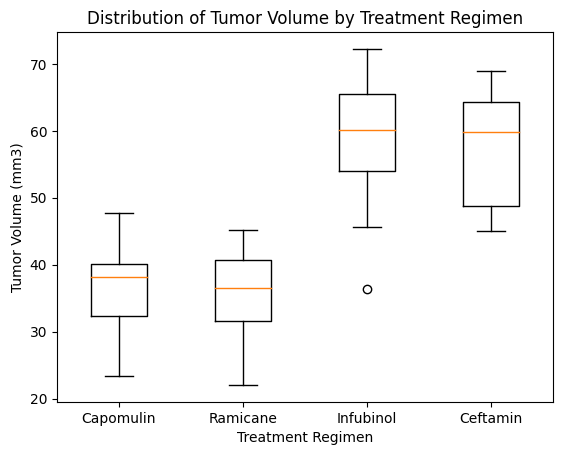

In [64]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = [merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)'] for treatment in treatments]

# Create a figure and axes for the plot
fig, ax = plt.subplots()

# Plot the box plot
ax.boxplot(tumor_vol_data)

# Set the labels and title
ax.set_xticklabels(treatments)
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Distribution of Tumor Volume by Treatment Regimen')

# Display the plot
plt.show()

## Line and Scatter Plots

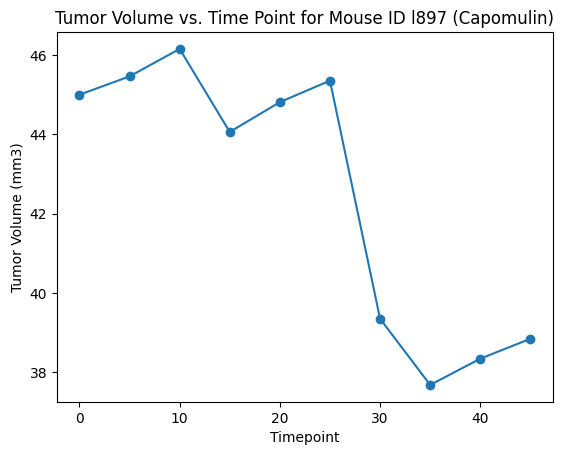

In [65]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l897'

mouse_data = complete_mouse_data.loc[(complete_mouse_data['Drug Regimen'] == 'Capomulin') & (complete_mouse_data['Mouse ID'] == mouse_id)]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'],linestyle='-', marker='o')

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)')

plt.show()


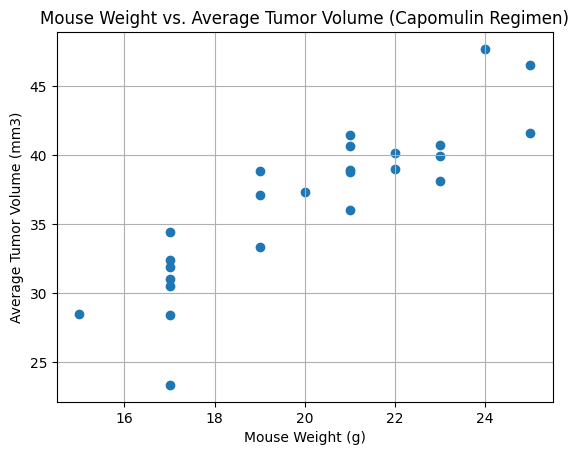

In [66]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.grid(True)
plt.show()

## Correlation and Regression

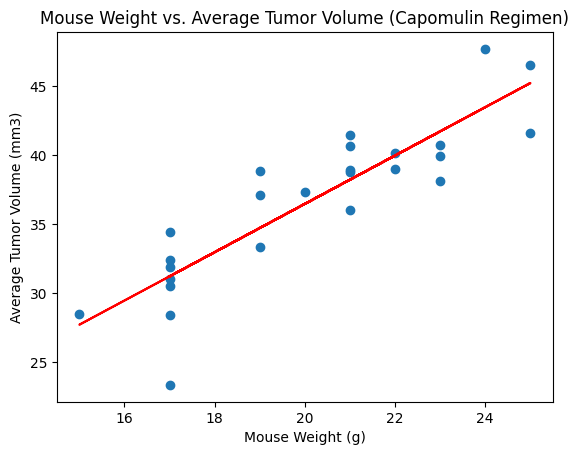

In [67]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

correlation = average_tumor_volume.corr(mouse_weight)

slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

regression_line = slope * mouse_weight + intercept
plt.plot(mouse_weight, regression_line, color='red')

plt.show()